In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Sélection des features (RFM + Comportementales)
# On prend Recence, Frequence, Montant et on peut ajouter le panier moyen
rfm['panier_moyen'] = rfm['montant'] / rfm['frequence']

features = ['recence', 'frequence', 'montant', 'panier_moyen']
data_clustering = rfm[features].copy()

# 2. Normalisation (StandardScaler)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Conversion en DataFrame pour plus de facilité
df_scaled = pd.DataFrame(data_scaled, columns=features)
print("Données normalisées prêtes pour le clustering.")

Données normalisées prêtes pour le clustering.


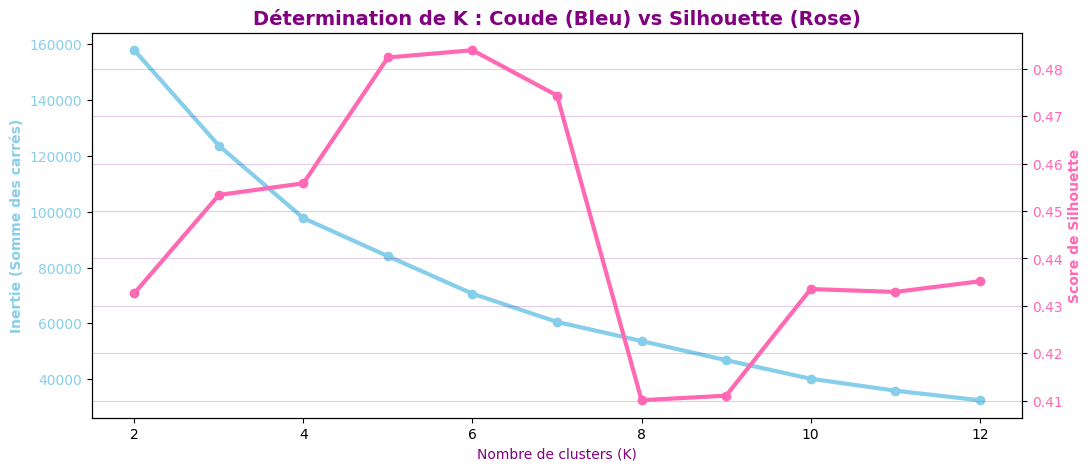

In [12]:
inertia = []
silhouette_pts = []
range_k = range(2, 13)

for k in range_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
    silhouette_pts.append(silhouette_score(df_scaled, km.labels_))

# Création du graphique double
fig, ax1 = plt.subplots(figsize=(12, 5))

# Courbe d'Inertie (Méthode du Coude) - en BLEU CIEL
ax1.plot(range_k, inertia, 'o-', color='skyblue', linewidth=3)
ax1.set_xlabel('Nombre de clusters (K)', color='purple')
ax1.set_ylabel('Inertie (Somme des carrés)', color='skyblue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Courbe de Silhouette - en ROSE
ax2 = ax1.twinx()
ax2.plot(range_k, silhouette_pts, 'o-', color='hotpink', linewidth=3)
ax2.set_ylabel('Score de Silhouette', color='hotpink', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='hotpink')

plt.title("Détermination de K : Coude (Bleu) vs Silhouette (Rose)", color='purple', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2, color='purple')
plt.show()

In [15]:

choix_k = 6

km_final = KMeans(n_clusters=choix_k, random_state=42, n_init=10)
rfm['Cluster'] = km_final.fit_predict(df_scaled)

# Calcul des statistiques descriptives par cluster
stats_clusters = rfm.groupby('Cluster')[features].mean()

# Affichage des moyennes par cluster pour t'aider à leur donner un nom
print("Profil moyen de chaque cluster :")
display(stats_clusters.style.background_gradient(cmap=custom_cmap)) # Utilise ta palette Bleu/Rose/Violet

Profil moyen de chaque cluster :


,recence,frequence,montant,panier_moyen
Cluster,,,,
0,175.191408,4.311688,314.948318,64.317037
1,737.412947,1.586084,89.563621,50.587494
2,3.400000,218.000000,377386.916000,2539.826053
3,104.340253,17.790464,4328.558057,422.495956
4,47.561644,133.500000,26751.733651,261.149820
5,539.000000,1.000000,-25111.090000,-25111.090000
